
# Project: Investigating the TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
> **Q1: Questions on Budget**
>1. What is the average budget of all movies?
>2. What movie has the lowest budget?
>3. What movie has the highest budget?
>4. Is there a relationship between budgets and profit?

> **Q2: Questions on Revenue**
>1. What is the average revenue for all movies?
>2. What movie has the lowest revenue?
>3. What movie has the higest revenue?
>4. Is there a relationship between revenue and profit?

> **Q3: Questions on Runtime**
>1. What is the average runtime for all movies?
>2. What movie has the lowest runtime?
>3. What movie has the highest runtime?
>4. Is there a relatinshio between runtime and profit?

>**Q4: Questions on Profit**
>1. What is the average profit for all movies?
>2. What movie has the lowest profit?
>3. What movie has the highest profit?

>**Q5: What genres are the most successful?**

>**Q6: What Director produced the most movies?**

>**Q7: What Actors are the most frequent?**



In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Loading the dataset

df_tmdb = pd.read_csv('tmdb-movies.csv', index_col=False)


In [3]:
# Printing the first 5 rows of the dataset
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Accessing some statistacl information about the dataset
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Checking for duplicated rows in the dataset
df_tmdb.duplicated().sum()

1

In [6]:
# Checking the dataset for datatpes and missing values

df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Observations from Wrangling the Dataset:
Describing The Columns In The Dataset:


1. `'id'`: This shows the id of each movie in the dataset.
2. `'imdb_id'`: This shows a unique id for each movie in the tmdb database.
3. `'popularity'`: This shows the popularity rating of each movie in the dataset.
4. `'budget'`: This shows the budget for each movie in the dataset. It is measured in US Dollars.   
5. `'revenue'`: This shows the revenue from each movie. Also measured in US Dollars.
6. `'original_title'`: This shows the title of each movie in the dataset.
7. `'cast'`: This shows the cast for each movie in the dataset.
8. `'budget_adj'`:  This shows the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
9. `'revenue_adj'`: This shows the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
10. `'homepage'`: This shows the website of the associated movie.
11. `'keywords'`: This shows a set of keywords for the associated movie.
12. `'director'`: This shows the director for the associated movie.
13. `'tagline'`: This shows the tagline for the associated movie.
14. `'overview'`: This shows the overview of the associated movie.
15. `'runtime'`: This shows the runtime for the associated movie.
16. `'genres'`: This shows the genre of the associated movie.
17. `'production_companies'`: This shows the production companies for the associated movie.
18. `'release_date'`: This shows the release date for the associated movie.
19. `'vote_count'`: This shows the vote count for the asociated movie.
20. `'vote_average'`: This shows the vote average of the associated movie.
21. `'release_year'`: This shows the release date for the associated movie.

Accessing the dataset reveals the following:

>1. There is one duplicated row in the dataset, which will need to be deleted
>2. Some columns in the dataset do not seem to be relevant to the analysis. Hence, they will be dropped. These include `'id'`, `'imdb_id'`, `'popularity'`, `'budget_adj'`, `'revenue_adj'`, `'homepage'`, `'keywords'`, `'tagline'`, `'overview'`, `'production_companies'`, `'vote_count'` and `'vote_average'`.
>3. Statistical investigation of the dataset reveals that there exits vlaues of '0' in the `budget` and `revenue` columns upto about **50% of the obeservation.** These rows needs to be dropped because they will hinder the analysis seeeing that we cannot determine the profit for such movies.
>4. The `runtime` column contains some '0' values. These rows in the column will need to be converted to NAN so they don't impact the analysis.
>5. `'release_date'` column needs to be converted into date format so the column can be easily accessed and deployed for analysis.
>6. There is a need to create a column for profits to aid the analysis.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
# Creating a function to clean the dataset

def clean_dataset(df, drop_columns):
    
    # Dropping duplicate row
    df.drop_duplicates(keep = 'first', inplace = True)     
    rows, cols = df.shape                             # Storing rows and columns details after removing duplicate row
    print('After removing duplicate row, we have a total of {} rows and {} columns.'.format(rows-1, cols))     # Outputing the new shape of the dateframe after removing duplicate rows
    print()                                                # Printing new line 
    
    # Dropping unnecessary columns
    df.drop(drop_columns, axis=1, inplace=True)                   
    print('The remain columns are {}'.format(list(df.columns)))  # Outputting remaining columns
    print()                                                      # Printing new line 
    
    
    # Replacing '0' values with NAN in the budget and revenue columns
    columns = ['budget', 'revenue']               # Columns that will be droppped
    df[columns] = df[columns].replace(0, np.NAN)  # Relacing 0 with NAN 
    df.dropna(subset=columns, inplace=True)       # Dropping NAN rows
    rows, cols = df.shape                    # Storing dataframe shape
    print('After removing NAN rows, we have a total of {} rows'.format(rows-1))   # Outputting new number of rows
    print()                                       # Printing new line
    
    # Replacing '0' values in runtime column with NAN
    df.runtime = df.runtime.replace(0, np.NAN)
    print("'0' values in the runtime column has been replaced with NAN")    # Printing notfication of replacement
    print()   # Printing new line
    
    # Converting release_date column to datetime format
    df.release_date = pd.to_datetime(df['release_date'])
    print('release_date has been converted to datetime')   # Printing notification of conversion
    print() # Printing new line
    
    # Creating profit column
    df['profit'] = df['revenue'] - df['budget']
    
    return df
    
    

In [8]:
#creating dictionary of columns to drop
drop_columns = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 
                'homepage', 'keywords', 'tagline', 'overview', 
                'production_companies', 'vote_count', 'vote_average']

In [9]:
# performing cleaning on dataset using the clean_dataset function

df_tmdb = clean_dataset(df_tmdb, drop_columns)

After removing duplicate row, we have a total of 10864 rows and 21 columns.

The remain columns are ['budget', 'revenue', 'original_title', 'cast', 'director', 'runtime', 'genres', 'release_date', 'release_year']

After removing NAN rows, we have a total of 3853 rows

'0' values in the runtime column has been replaced with NAN

release_date has been converted to datetime



In [10]:
df_tmdb.head()       # inspecting cleaned dataset

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1.316249e+09


In [11]:
df_tmdb.describe()   # inspecting cleaned dataset' statistics

,budget,revenue,runtime,release_year,profit
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3.854000e+03
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028,7.048292e+07
std,4.220822e+07,1.765393e+08,19.922820,11.282575,1.506195e+08
min,1.000000e+00,2.000000e+00,15.000000,1960.000000,-4.139124e+08
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000,-1.321535e+06
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000,2.002019e+07
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000,8.170331e+07
max,4.250000e+08,2.781506e+09,338.000000,2015.000000,2.544506e+09


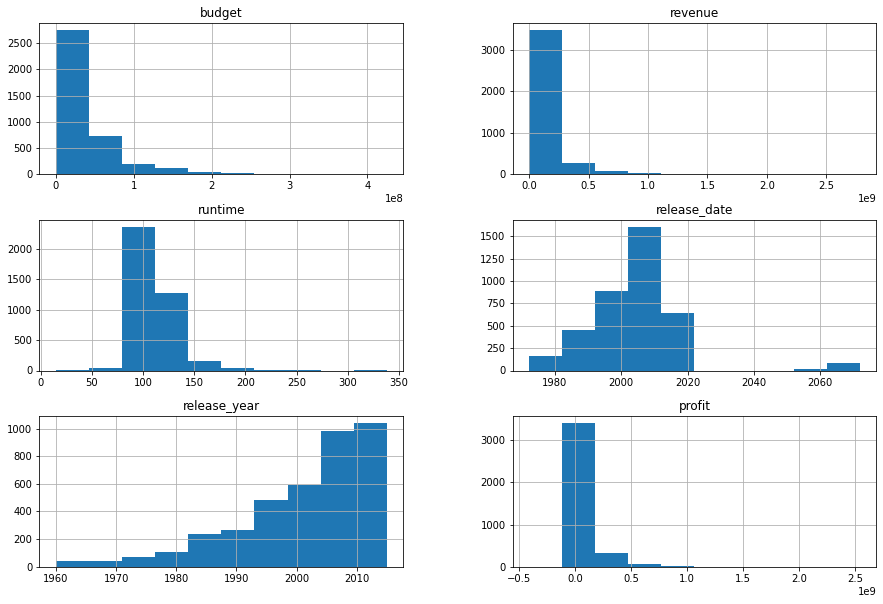

In [12]:
df_tmdb.hist(figsize=(15,10));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### **Q1: Questions on Budget**
>1. What is the average budget of all movies?
>2. What movie has the lowest budget?
>3. What movie has the highest budget?
>4. Is there a relationship between budgets and profit?

In [13]:
#1. What is the average budget for all movies?

print('Average budget for all movies is {}'.format(round(df_tmdb.budget.mean(), 2)))


Average budget for all movies is 37203696.95


In [14]:
# Movie with the lowest budget
df_tmdb.loc[df_tmdb['budget'].idxmin()]

budget                                                          1.0
revenue                                                       100.0
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
director                                               Jeff Pollack
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
profit                                                         99.0
Name: 2618, dtype: object

In [15]:
# Movie with the highest budget
df_tmdb.loc[df_tmdb['budget'].idxmax()]

budget                                                  425000000.0
revenue                                                  11087569.0
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                 -413912431.0
Name: 2244, dtype: object

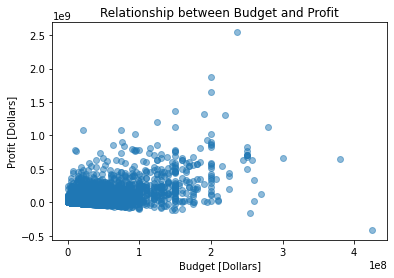

In [16]:
# Relationship between Budget and Profit
plt.xlabel('Budget [Dollars]')   # x-axis
plt.ylabel('Profit [Dollars]')    # y-axis
plt.title('Relationship between Budget and Profit')    # Title of plot
plt.scatter(df_tmdb['budget'], df_tmdb['profit'], alpha=0.5)
plt.show();

#### Answers:
>1. Average budget for all movies is **37203696.95**
>2. The movie with the lowest budget is **Lost & Found**
>3. The movie with the highest budget is **The Warrior's Way**
>4. There is exists no particular relationship between budget and profit.

### **Q2: Questions on Revenue**
>1. What is the average revenue for all movies?
>2. What movie has the lowest revenue?
>3. What movie has the higest revenue?
>4. Is there a relationship between revenue and profit?


In [17]:
# What is the average revenue for all movies?

print(round(df_tmdb.revenue.mean(), 2))


107686616.1


In [18]:
# What movie has the lowest revenue?
df_tmdb.loc[df_tmdb['revenue'].idxmin()]

budget                                                    6000000.0
revenue                                                         2.0
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                  Billy Ray
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
profit                                                   -5999998.0
Name: 5067, dtype: object

In [19]:
# What movie has the highest revenue?
df_tmdb.loc[df_tmdb['revenue'].idxmax()]

budget                                                  237000000.0
revenue                                                2781505847.0
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                 2544505847.0
Name: 1386, dtype: object

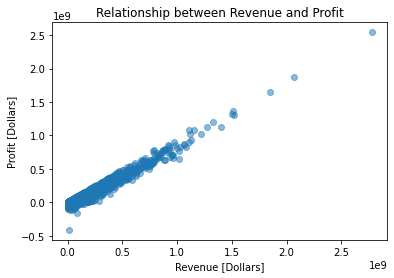

In [20]:
# Checking for relatinship between Revenue and Profit

plt.xlabel('Revenue [Dollars]')   # x-axis
plt.ylabel('Profit [Dollars]')    # y-axis
plt.title('Relationship between Revenue and Profit')    # Title of plot
plt.scatter(df_tmdb['revenue'], df_tmdb['profit'], alpha=0.5)
plt.show();

#### Answers:
>1.  The average revenue for all movies is **107686616.1**
>2.  The movie with the lowest revenue is **Shattered Glass**
>3.  The movie with the higest revenue is **Avatar**
>4.  We see that there exists a strong positive relationship between Revenue and Profit. 

### **Q3: Questions on Runtime**
>1. What is the average runtime for all movies?
>2. What movie has the lowest runtime?
>3. What movie has the highest runtime?
>4. Is there a relatinshio between runtime and profit?


In [21]:
# Average runtime for all movies
print('Average runtime for all movies is {} mins'.format(round(df_tmdb.runtime.mean(), 2)))

Average runtime for all movies is 109.22 mins


In [22]:
# Movie with the lowest runtime
df_tmdb.loc[df_tmdb['runtime'].idxmin()]

budget                                                         10.0
revenue                                                         5.0
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director                                        Shinichiro Watanabe
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
profit                                                         -5.0
Name: 5162, dtype: object

In [23]:
# Movie with the highest runtime
df_tmdb.loc[df_tmdb['runtime'].idxmax()]

budget                                                   18000000.0
revenue                                                    871279.0
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                            Olivier Assayas
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
profit                                                  -17128721.0
Name: 2107, dtype: object

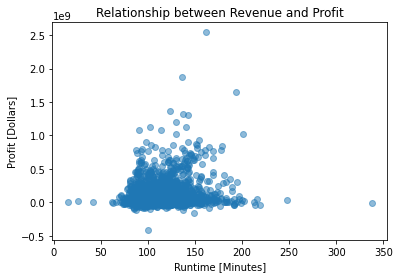

In [24]:
# Checking for relatinship between runtime and Profit

plt.xlabel('Runtime [Minutes]')   # x-axis
plt.ylabel('Profit [Dollars]')    # y-axis
plt.title('Relationship between Revenue and Profit')    # Title of plot
plt.scatter(df_tmdb['runtime'], df_tmdb['profit'], alpha=0.5)
plt.show();

#### Answers:
>1. Average runtime for all movies is **109.22 mins**
>2. Movie with the lowest runtime is **Kid's Story**
>3. Movie with the highest runtime is **Carlos**
>4. The scatter plot of runtime and profit reveals that most of the movies have runtime in range of 85 to 120 Minutes.

### **Q4: Questions on Profit**
>1. What is the average profit for all movies?
>2. What movie has the lowest profit?
>3. What movie has the highest profit?

In [25]:
# Average profit for all movies
print('Average profit for all movies is {} Dollars'.format(round(df_tmdb.profit.mean(), 2)))

Average profit for all movies is 70482919.14 Dollars


In [26]:
# Movie with the lowest profit
df_tmdb.loc[df_tmdb['profit'].idxmin()]

budget                                                  425000000.0
revenue                                                  11087569.0
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                 -413912431.0
Name: 2244, dtype: object

In [27]:
# Movie with the highest profit
df_tmdb.loc[df_tmdb['profit'].idxmax()]

budget                                                  237000000.0
revenue                                                2781505847.0
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                 2544505847.0
Name: 1386, dtype: object

#### Answers:
>1. Average profit for all movies is **$70482919.14**
>2. Movie with the lowest profit is **The Warrior's Way**
>3. Movie with the highest profit is **Avatar**

### **Q5: What genres are the most successful?**

In [28]:
# Showing the top ten most succesful genres for movies that made profit of more than 250 mil Dollars

df_tmdb_profit250m = df_tmdb[df_tmdb['profit'] > 25000000]   # Subsetting the dataset for movies with >250 mil Dollars profit

# concating the genres column, splitting them and count each unique genre, then saving them in a series
tmdb_genres = pd.Series(df_tmdb_profit250m['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)

# Printing the top ten genres
tmdb_genres.head(10)

Drama              688
Comedy             645
Action             566
Thriller           542
Adventure          450
Romance            292
Crime              287
Family             265
Science Fiction    250
Fantasy            227
dtype: int64

> **The top ten most successful genres are:**
>>1. Drama              688
>>2. Comedy             645
>>3. Action             566
>>4. Thriller           542
>>5. Adventure          450
>>6. Romance            292
>>7. Crime              287
>>8. Family             265
>>9. Science Fiction    250
>>10. Fantasy            227

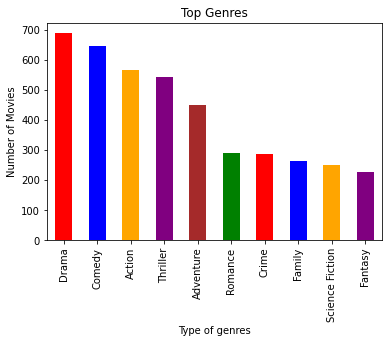

In [29]:
# Visualizing the top ten genres with a bar chart

diagram = tmdb_genres.head(10).plot.bar(color=['red', 'blue', 'orange', 'purple', 'brown', 'green'],fontsize = 10)
diagram.set(title = 'Top Genres')       # Plot tile
diagram.set_xlabel('Type of genres')    # x-axis label
diagram.set_ylabel('Number of Movies')  # y-axis label
plt.show();

### **Q6: What Director produced the most movies?**

In [32]:
# Showing the Director who produced the most movies

#counting unique values in the director column
tmdb_directors_count = pd.Series(df_tmdb['director'].value_counts(ascending = False))

# Printing out the director with the most movies
print(tmdb_directors_count.keys()[0], ':', tmdb_directors_count[tmdb_directors_count.keys()[0]])

Steven Spielberg : 27


In [33]:
# Showing the Director who made the most profit

# Subsetting the dataset for the movie with highest profit 
df_tmdb_profit250m = df_tmdb[df_tmdb['profit'] == 2544505847.0]

# Locating the director with the highest profit
tmdb_directors_count = pd.Series(df_tmdb_profit250m['director'].value_counts(ascending = False))

# Printing out the name of the director
tmdb_directors_count.keys()[0]

'James Cameron'

#### Answers: 
> The Director who produced the most movies is **Steven Spielberg**, with a total of 29 movies.

> The Director who made the most profit is **James Cameron**, with the movie Avatar.

### **Q7: What Actors are the most frequent?**

In [34]:
# Concatenating and splitting the unique values in the cast column
tmdb_cast = df_tmdb['cast'].str.cat(sep = '|').split('|')

# Counting the unique values in the cast solumn
tmdb_cast_count = pd.Series(tmdb_cast).value_counts(ascending = False)

# Printing the top 10 most frequent actors
tmdb_cast_count.head(10)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Harrison Ford         34
Tom Hanks             34
Sylvester Stallone    34
dtype: int64

#### Answers:
> The top 10 most frequent actors are:
    >>1. Robert De Niro        **(52 Appearances)**
>>2. Bruce Willis          **(46 Appearances)**
>>3. Samuel L. Jackson     **(44 Appearances)**
>>4. Nicolas Cage          **(43 Appearances)**
>>5. Matt Damon            **(36 Appearances)**
>>6. Johnny Depp           **(35 Appearances)**
>>7. Morgan Freeman        **(34 Appearances)**
>>8. Harrison Ford         **(34 Appearances)**
>>9. Tom Hanks             **(34 Appearances)**
>>10. Sylvester Stallone    **(34 Appearances)**


<a id='conclusions'></a>
## Conclusions

**On Budget**
>1. Average budget for all movies is **37203696.95**
>2. The movie with the highest budget is **The Warrior's Way**
>3. There is exists no particular relationship between budget and profit.

**On Revenue**
>1.  The average revenue for all movies is **107686616.1**
>2.  The movie with the higest revenue is **Avatar**
>3.  There is a strong positive relationship between Revenue and Protif. 

**On Runtime**
>1. Average runtime for all movies is **109.22 mins**
>2. Movie with the highest runtime is **Carlos**
>3. The scatter plot of runtime and profit shows that most of the movies have runtime in range of 85 to 120 Minutes.

**On Profits**
>1. Average profit for all movies is **$70482919.14**
>2. Movie with the highest profit is **Avatar**

**On Genres**
> **The top ten most successful genres are:**
>>1. Drama              **688**
>>2. Comedy            **645**
>>3. Action             **566**
>>4. Thriller           **542**
>>5. Adventure          **450**
>>6. Romance            **292**
>>7. Crime              **287**
>>8. Family             **265**
>>9. Science Fiction    **250**
>>10. Fantasy            **227**

**On Director who produced the most movies**
> The Director who produced the most movies is **Steven Spielberg**, with a total of 29 movies.

> The Director who made the most profit is **James Cameron**, with the movie Avatar.

**On The Most Frequent Actors**
> The top 10 most frequent actors are:
>>1. Robert De Niro        **(52 Appearances)**
>>2. Bruce Willis          **(46 Appearances)**
>>3. Samuel L. Jackson     **(44 Appearances)**
>>4. Nicolas Cage          **(43 Appearances)**
>>5. Matt Damon            **(36 Appearances)**
>>6. Johnny Depp           **(35 Appearances)**
>>7. Morgan Freeman        **(34 Appearances)**
>>8. Harrison Ford         **(34 Appearances)**
>>9. Tom Hanks             **(34 Appearances)**
>>10. Sylvester Stallone    **(34 Appearances)**
